In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [7]:
# Step 1: Load the data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project-1/diamonds.csv")

In [8]:
# Step 2: Inspect the data
print(data.head())
print(data.info())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: f

In [9]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

# **Data Visualization**


---


This code creates a 3x3 grid of subplots using matplotlib to visualize various aspects of the dataset data (likely a diamonds dataset). Here's a brief explanation of each plot and its parameters:

**Histogram (Axes[0]):**

* Plots the distribution of price using sns.histplot.
* Parameters: kde=True (adds a density estimate), bins=50 (number of bins), color="blue" (blue color).

**Scatter Plot (Axes[1]):**
* Visualizes the relationship between carat and price, colored by cut using sns.scatterplot.
* Parameters: x="carat", y="price", hue="cut" (color by cut), alpha=0.6 (transparency).

**Box Plot by Cut (Axes[2]):**
* Shows price distribution across cut categories using sns.boxplot.
* Parameters: x="cut", y="price", palette="muted" (color palette).

**Box Plot by Color (Axes[3]):**
* Displays price distribution for different color categories using sns.boxplot.
* Parameters: x="color", y="price", palette="coolwarm" (blue-red palette).

**Heatmap (Axes[4]):**
* Heatmap of average prices by cut (rows) and color (columns) using sns.heatmap.
* Parameters: annot=True (show values), fmt=".0f" (integer format), cmap="YlGnBu" (yellow-green-blue color map).

**Bar Plot (Axes[5]):**
* Bar plot of average price grouped by clarity using sns.barplot.
* Parameters: x=avg_price_by_clarity.index, y=avg_price_by_clarity.values, palette="viridis".

**Count Plot (Axes[6]):**
* Displays the frequency of each clarity value using sns.countplot.
* Parameters: order=data['clarity'].value_counts().index (sorted by frequency), palette="viridis".

**Violin Plot (Axes[7]):**
* Shows price distribution by clarity, split by cut using sns.violinplot.
* Parameters: x="clarity", y="price", hue="cut", split=True (split by hue), palette="pastel".

**Scatter Plot (Axes[8]):**
* Scatter plot of depth vs. table, colored by cut using sns.scatterplot.
* Parameters: x="depth", y="table", hue="cut", alpha=0.6.

**Layout Details:**
* plt.subplots(3, 3, figsize=(18, 15)): Creates a 3x3 grid with each subplot sized for better readability.
* plt.tight_layout(): Adjusts spacing between plots to avoid overlaps.

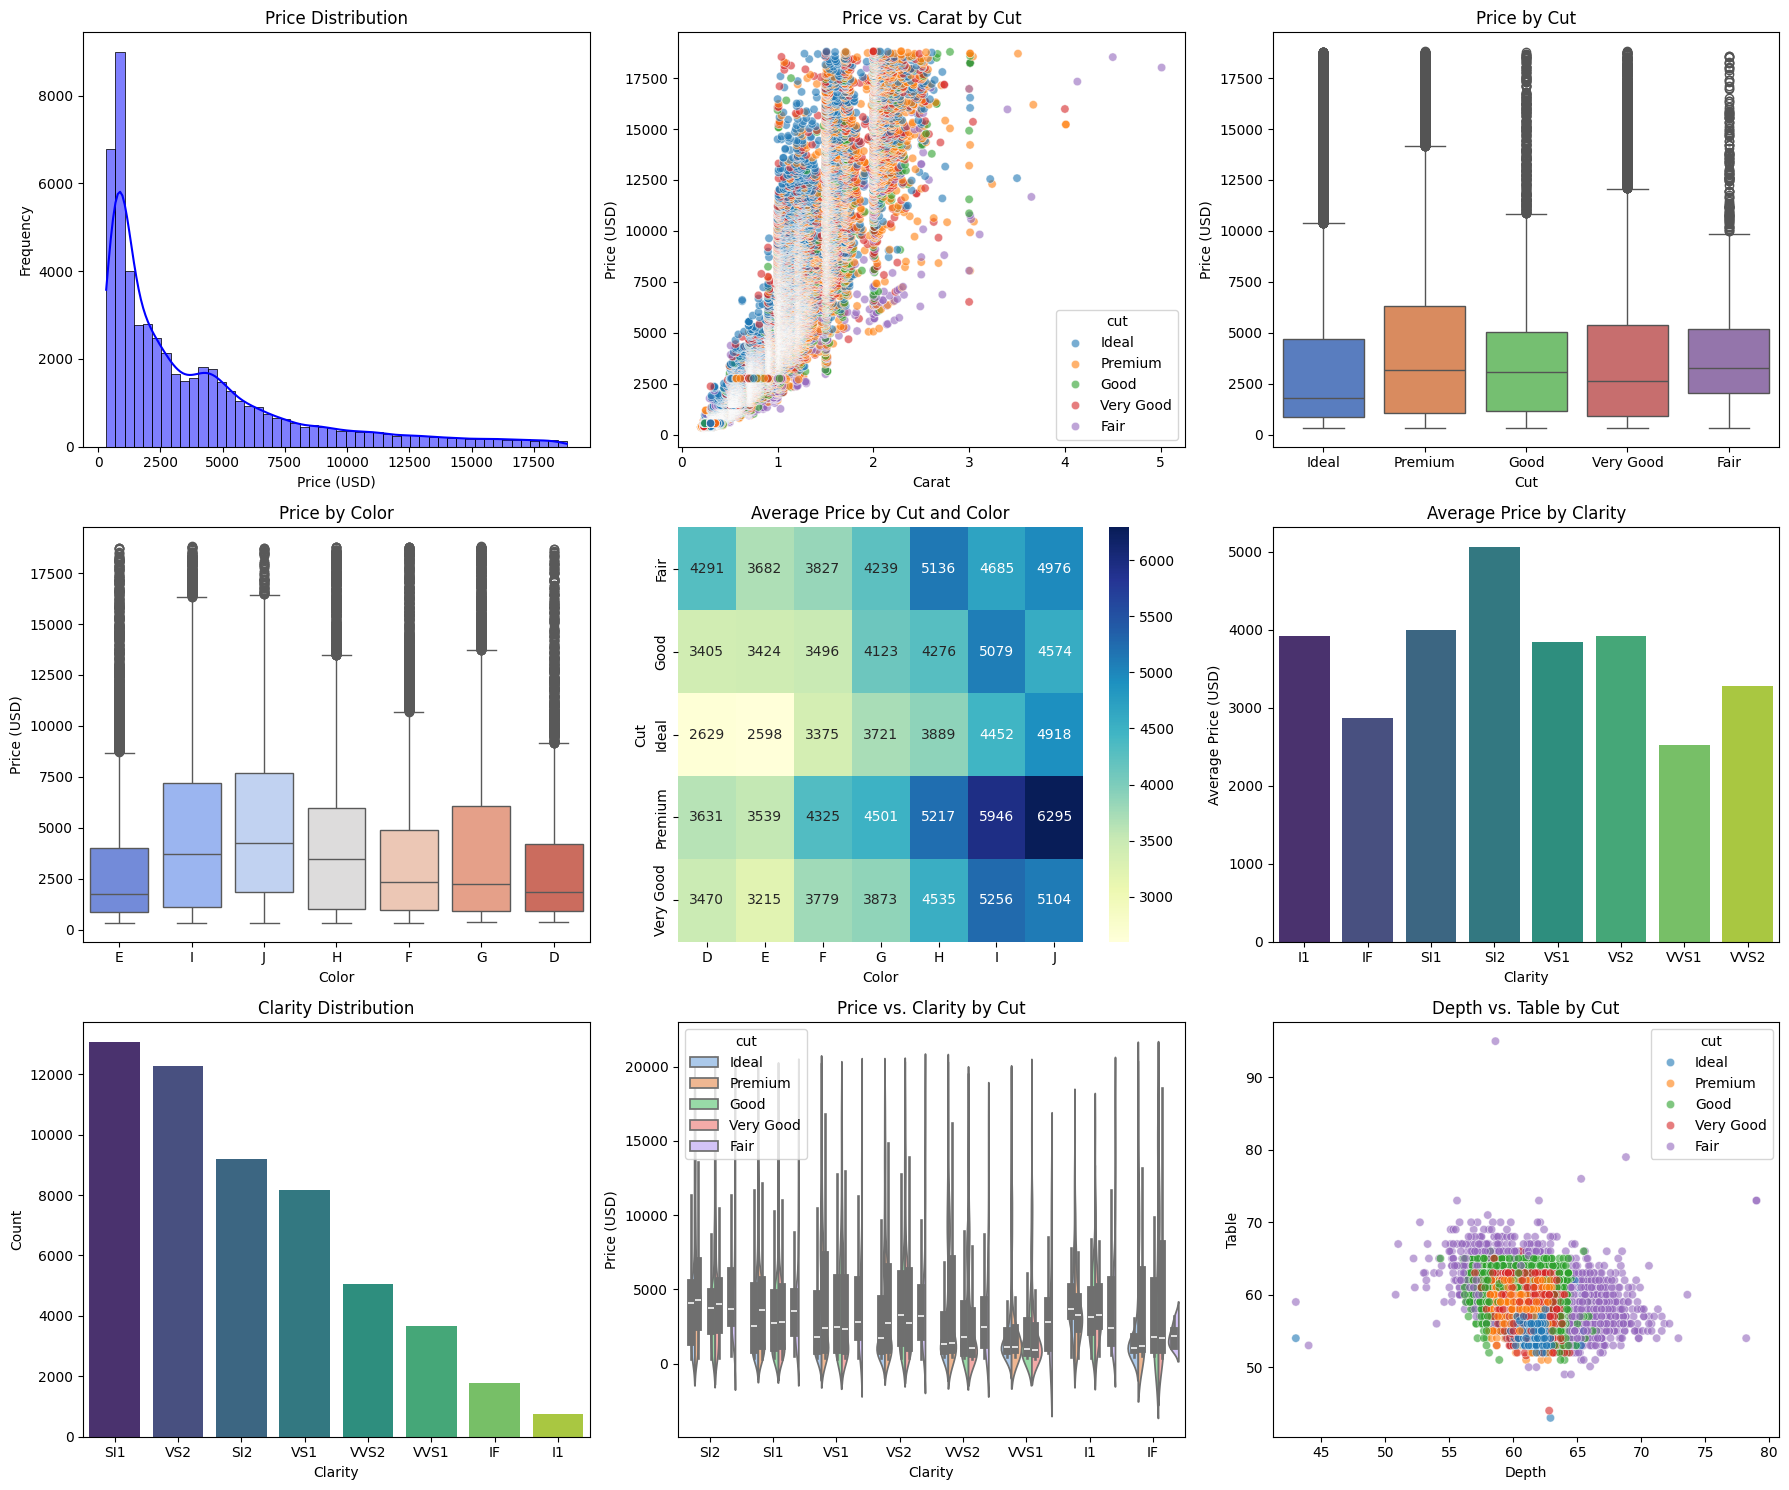

In [10]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()  # Flatten the 3x3 array for easier iteration

# 1. Histogram: Price Distribution
sns.histplot(data['price'], kde=True, color="blue", bins=50, ax=axes[0])
axes[0].set_title("Price Distribution")
axes[0].set_xlabel("Price (USD)")
axes[0].set_ylabel("Frequency")

# 2. Scatter Plot: Price vs. Carat by Cut
sns.scatterplot(data=data, x="carat", y="price", hue="cut", alpha=0.6, ax=axes[1])
axes[1].set_title("Price vs. Carat by Cut")
axes[1].set_xlabel("Carat")
axes[1].set_ylabel("Price (USD)")

# 3. Box Plot: Price by Cut
sns.boxplot(data=data, x="cut", y="price", palette="muted", ax=axes[2])
axes[2].set_title("Price by Cut")
axes[2].set_xlabel("Cut")
axes[2].set_ylabel("Price (USD)")

# 4. Box Plot: Price by Color
sns.boxplot(data=data, x="color", y="price", palette="coolwarm", ax=axes[3])
axes[3].set_title("Price by Color")
axes[3].set_xlabel("Color")
axes[3].set_ylabel("Price (USD)")

# 5. Heatmap: Average Price by Cut and Color
pivot_table = data.pivot_table(values="price", index="cut", columns="color", aggfunc="mean")
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", cbar=True, ax=axes[4])
axes[4].set_title("Average Price by Cut and Color")
axes[4].set_xlabel("Color")
axes[4].set_ylabel("Cut")

# 6. Bar Plot: Average Price by Clarity
avg_price_by_clarity = data.groupby('clarity')['price'].mean().sort_index()
sns.barplot(x=avg_price_by_clarity.index, y=avg_price_by_clarity.values, palette="viridis", ax=axes[5])
axes[5].set_title("Average Price by Clarity")
axes[5].set_xlabel("Clarity")
axes[5].set_ylabel("Average Price (USD)")

# 7. Count Plot: Clarity Distribution
sns.countplot(data=data, x="clarity", order=data
['clarity'].value_counts().index, palette="viridis", ax=axes[6])
axes[6].set_title("Clarity Distribution")
axes[6].set_xlabel("Clarity")
axes[6].set_ylabel("Count")

# 8. Violin Plot: Price vs. Clarity
sns.violinplot(data=data, x="clarity", y="price", hue="cut", split=True, palette="pastel", ax=axes[7])
axes[7].set_title("Price vs. Clarity by Cut")
axes[7].set_xlabel("Clarity")
axes[7].set_ylabel("Price (USD)")

# 9. Scatter Plot: Depth vs. Table
sns.scatterplot(data=data, x="depth", y="table", hue="cut", alpha=0.6, ax=axes[8])
axes[8].set_title("Depth vs. Table by Cut")
axes[8].set_xlabel("Depth")
axes[8].set_ylabel("Table")

# Adjust layout
plt.tight_layout()
plt.show()


# Checking for Null Values


---


The data.isnull().sum() function in pandas is used to check for missing values (NaN) in each column of the DataFrame data.

* data.isnull(): Returns a DataFrame of the same shape as data, with True for
entries that are NaN (missing) and False for non-missing entries.
* .sum(): Adds up the number of True values (i.e., missing values) for each column, providing a count of missing values per column.

In [11]:
data.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


# Checking for Outliers


---


**sns.boxplot(data=data):**
* Creates a boxplot for each numerical column in data (non-numerical columns are ignored automatically).
* Boxplots visually summarize the distribution of data, highlighting:
* Median(Q2-middle line of the box).
* Interquartile range (IQR)(Q3-Q1) (box boundaries).
* Outliers (points beyond the whiskers).

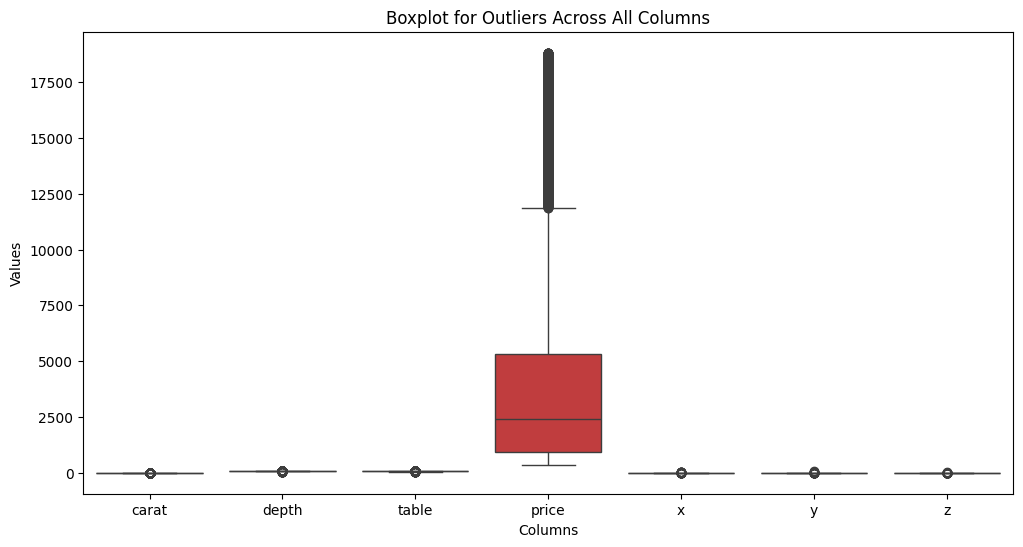

In [12]:
# Create a boxplot for each column
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)

# Customize plot (optional)
plt.title('Boxplot for Outliers Across All Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Display the plot
plt.show()


In [13]:
# Step 3: Define features and target
X = data.drop(columns=["price"])
y = data["price"]

In [14]:
# Step 4: Preprocessing
# Identify categorical and numerical features
categorical_features = ["cut", "color", "clarity"]
numerical_features = ["carat", "depth", "table", "x", "y", "z"]

# Encoding


---


* Encoding helps in converting categorical data into numerical.
* We have different types in encoding techniques, In this project Label Encoding is used because of low cardinality(Limited number of categories).
**X[col] = label_encoder.fit_transform(X[col]):*

* For each column in categorical_features, the code:
    * fit_transform: Fits the encoder on the unique values of the column and transforms them into integer labels.
* Replaces the original categorical data in column col with its encoded integer representation.

In [15]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply Label Encoding to the specified categorical features
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

print(X.head())

   carat  cut  color  clarity  depth  table     x     y     z
0   0.23    2      1        3   61.5   55.0  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0  4.34  4.35  2.75


# Scaling


---


1.  ***scaler = StandardScaler():***
  * This scaler standardizes features by removing the mean and scaling to unit variance (z-score normalization).
  * It transforms the data so that each feature will have a mean of 0 and a standard deviation of 1.
  * This is useful for many machine learning algorithms that assume data is normally distributed or sensitive to feature scaling.
2. ***X[numerical_features] = scaler.fit_transform(X[numerical_features]):***
 *** fit_transform:***
  * fit(): Computes the mean and standard deviation of the selected numerical columns.
  * transform(): Scales the numerical features using the computed mean and standard deviation.

After scaling, the transformed values replace the original values in the specified columns of X.





In [16]:
# Scale numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Splitting Data for Training & Testing


---

* X: The features (independent variables) of the dataset.

* y: The target (dependent variable) of the dataset, which you want to predict.
* X_train: The training feature set (60% of data).
* X_test: The testing feature set (40% of data).
* y_train: The training target set.
* y_test: The testing target set
* *test_size=0.4:* Specifies that 40% of the data will be used for testing (X_test and y_test)

In [17]:
# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Evaluating & Comparing Model Performance for Different Regression Algorithms


---

To determine the best-performing model, we evaluate the algorithms based on several criteria:

* **Accuracy:** We use metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²) to measure the accuracy of the model.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
#from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [19]:
# Define a list of regression algorithms to test
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    #'Support Vector Regressor': SVR(kernel='rbf', C=1.0, epsilon=0.1),
}

In [20]:
# Function to evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = []
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate performance metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

        #Model accuracy
        accuracy = model.score(X_test, y_test)
        #print(f"Model Accuracy {name}: {accuracy * 100:.2f}%")

        results.append({
            'Model': name,
            'MSE': mse,
            'R2': r2,
            'CV Mean R2': np.mean(cv_scores),
            #'CV Std R2': np.std(cv_scores),
            'Model Accuracy': accuracy * 100
        })
    return pd.DataFrame(results)

In [21]:
# Evaluate all models
results_df = evaluate_models(models, X_train, X_test, y_train, y_test)

# Sort results by R2 score
results_df = results_df.sort_values(by='Model Accuracy', ascending=False)

# Display the results
results_df

,Model,MSE,R2,CV Mean R2,Model Accuracy
2,Random Forest,3.064332e+05,0.980649,0.979177,98.064918
3,Gradient Boosting,4.413316e+05,0.972131,0.970993,97.213055
1,Decision Tree,5.947941e+05,0.962440,0.961570,96.243961
0,Linear Regression,1.810098e+06,0.885695,0.880292,88.569490


# Selection of Random Forest Regressor as the Best Model


---
The model that provides the lowest error metric (such as MSE or RMSE) and the highest R² value on the test set is considered the best model.

After evaluating various regression algorithms, we found that the Random Forest Regressor performed the best for our dataset.

# Data Overfitting


---



When I gave n_estimators=100, the data is 'Overfitting'. So I reduced the estimators count to 50 and specified the depth(height) of the tree's to be 7.
This reduction helps to overcome 'Overfitting'

In [22]:
# Step 6: Train the model
model = RandomForestRegressor(n_estimators=50,max_depth=7,random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=50, random_state=42)

In [23]:
# Step 7: Evaluate the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 522380.63134757156
Mean Absolute Error: 404.54138679617665
R-squared: 0.9670124168658535


In [24]:
# Step 8: Calculate accuracy
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 96.70%


# Predicting Diamond Price for New Data(Validation Test)

---
* A sample diamond (new_diamond) is provided with its features (e.g., carat, cut, color, clarity, depth, etc.).
* The predicted price for the new diamond is calculated by calling the predict_diamond_price() function and is displayed with the result.


In [25]:
# Step 10: Predict price for new data
def predict_diamond_price(new_data):
    # Convert new_data into a DataFrame
    new_data_df = pd.DataFrame([new_data])

    # One-hot encode the categorical features
    new_data_encoded = pd.get_dummies(new_data_df, columns=categorical_features, drop_first=True)

    # Align the new data columns with the training set
    missing_cols = set(X.columns) - set(new_data_encoded.columns)
    for col in missing_cols:
        new_data_encoded[col] = 0
    new_data_encoded = new_data_encoded[X.columns]

    # Scale the numerical features
    new_data_encoded[numerical_features] = scaler.transform(new_data_encoded[numerical_features])

    # Predict the price
    predicted_price = model.predict(new_data_encoded)
    return predicted_price[0]

# Example: Predict for a new diamond
new_diamond = {
    "carat": 0.7,
    "cut": "Ideal",
    "color": "G",
    "clarity": "VS1",
    "depth": 61.5,
    "table": 45,
    "x": 5.8,
    "y": 6.75,
    "z": 3.6
}

predicted_price = predict_diamond_price(new_diamond)
print(f"Predicted Price for the new diamond: ${predicted_price:.2f}")

Predicted Price for the new diamond: $3166.32
